In [1]:
from loader_util import *

folder = '/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a'

list_all_xml = get_list_extension(folder, 'xml')
samples = list_all_xml[:3]
print(samples)

['/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/a-love-like-pi/heavens-halberd/verse.xml', '/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/aesop-rock/daylight/instrumental.xml', '/home/azuma/workspace/git/lead-sheet-dataset/datasets/xml/a/astor-piazzolla/libertango/chorus.xml']


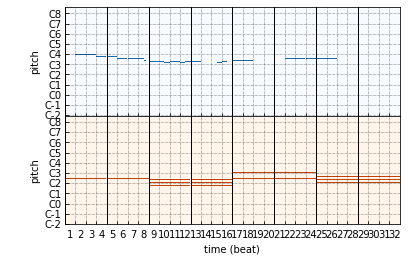

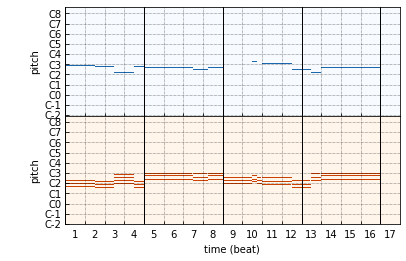

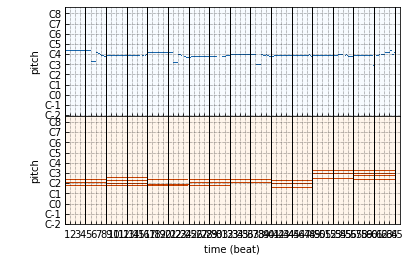

In [2]:
%matplotlib inline
import os
from tab_parser import proc_xml
from roman_to_symbol import proc_roman_to_symbol
import matplotlib.pyplot as plt

save_path = './dataset'

for i, sample in enumerate(samples):
    file_path = sample
    raw_roman = proc_xml(file_path)

    # to event symbol
    raw_symbol = proc_roman_to_symbol(raw_roman)

    # to midi
    beats_in_measure = int(raw_symbol['metadata']['beats_in_measure'])
    proc_event_to_midi(raw_symbol, name=str(i))
    
    pianoroll = proc_midi_to_pianoroll(os.path.join(save_path, str(i) + '.mid'), beats_in_measure)
    pianoroll.plot()
    plt.show()
    
plt.close()

In [10]:
def generate_dict_time_notes(list_all_midi, batch_song = 3, start_index=0, fs=30, use_tqdm=True):
    assert len(list_all_midi) >= batch_song
    
    dict_time_notes = {}
    process_midi = range(start_index,  min(start_index + batch_song, len(list_all_midi)) )
    
    for i in process_midi:
        midi_file_name = list_all_midi[i]
        print(midi_file_name)
        try: # Handle exception on malformat MIDI files
            midi_pretty_format = pretty_midi.PrettyMIDI(midi_file_name)
            piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
            piano_roll = piano_midi.get_piano_roll(fs=fs)
            
            name = int(midi_file_name.split('.')[0])
            dict_time_notes[name] = piano_roll
        except Exception as e:
            print(e)
            print("broken file : {}".format(midi_file_name))
            pass
    return dict_time_notes

In [11]:
import pickle
f = open(str(0) + ".chord","rb")
list_row = pickle.load(f)

print(list_row)

[['dm', 0.0, 1.9047619047619047], ['dm', 1.9047619047619047, 3.8095238095238093], ['am', 3.8095238095238093, 5.7142857142857135], ['am', 5.7142857142857135, 7.619047619047619], ['F', 7.619047619047619, 9.523809523809524], ['F', 9.523809523809524, 11.428571428571427], ['C', 11.428571428571427, 13.333333333333332], ['C', 13.333333333333332, 15.238095238095237]]


2.mid
0.mid
1.mid
dict_keys([2, 0, 1])


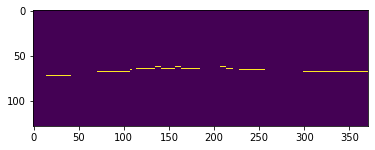

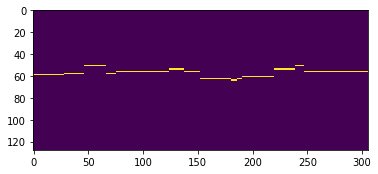

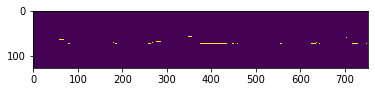

In [12]:
midi_list = glob.glob("*.mid") 
dict_time_notes = generate_dict_time_notes(midi_list)
print(dict_time_notes.keys())

plt.imshow(dict_time_notes[0])
plt.show()
plt.imshow(dict_time_notes[1])
plt.show()
plt.imshow(dict_time_notes[2])
plt.show()

In [15]:
def create_list_time_chord(chord_symbols, fs=30):
     
    chord_list = []
    for chord_info in chord_symbols:
        # get upper code of oncode
        # Todo: use regular expression
        if '|' in chord_info[0]:
            chord = chord_info[0].split('|')[0]
        elif ' ' in chord_info[0]:
            chord = chord_info[0].split(' ')[0]
        else:
            chord = chord_info[0]
        chord_list.append(chord)
        
    counter = 0
    list_time_chord = []
    for i in range(len(chord_symbols)):
        while True:
            list_time_chord.append(chord_list[i])
            counter += 1
            if counter > int(chord_symbols[i][2] * fs):
                break

    return list_time_chord


import pickle
list_chord_symbols = []
for i in range(3):
    with open(str(i) + ".chord","rb") as f:
        list_chord_symbols.append((pickle.load(f)))

print(dict_time_notes[0].shape)
list_time_chord_0 = create_list_time_chord(list_chord_symbols[0])
print(len(list_time_chord_0))

print(dict_time_notes[1].shape)
list_time_chord_1 = create_list_time_chord(list_chord_symbols[1])
print(len(list_time_chord_1))

print(dict_time_notes[2].shape)
list_time_chord_2 = create_list_time_chord(list_chord_symbols[2])
print(len(list_time_chord_2))

(128, 371)
458
(128, 306)
307
(128, 752)
753


In [14]:
print(list_chord_symbols[0])

[['dm', 0.0, 1.9047619047619047], ['dm', 1.9047619047619047, 3.8095238095238093], ['am', 3.8095238095238093, 5.7142857142857135], ['am', 5.7142857142857135, 7.619047619047619], ['F', 7.619047619047619, 9.523809523809524], ['F', 9.523809523809524, 11.428571428571427], ['C', 11.428571428571427, 13.333333333333332], ['C', 13.333333333333332, 15.238095238095237]]


In [44]:
chord_symbols

[['am', 0.0, 3.1372549019607843],
 ['B7 | A', 3.1372549019607843, 6.2745098039215685],
 ['am sus42', 6.2745098039215685, 9.411764705882353],
 ['am', 9.411764705882353, 12.549019607843137],
 ['C | G', 12.549019607843137, 15.686274509803921],
 ['B | Gb', 15.686274509803921, 18.823529411764707],
 ['bo | F', 18.823529411764707, 21.96078431372549],
 ['E7', 21.96078431372549, 25.098039215686274]]

In [45]:
fs = 30
start = 0.0
end = chord_symbols[-1][-1]

chord_list = []

for chord_info in chord_symbols:
    
    # get upper code of oncode
    # Todo: use regular expression
    if '|' in chord_info[0]:
        chord = chord_info[0].split('|')[0]
    elif ' ' in chord_info[0]:
        chord = chord_info[0].split(' ')[0]
    else:
        chord = chord_info[0]
    
    chord_list.append(chord)
    
print(chord_list)

['am', 'B7 ', 'am', 'am', 'C ', 'B ', 'bo ', 'E7']


In [31]:
counter = 0
chord_data = []
for i in range(len(chord_symbols)):
    
    while True:
        chord_data.append(chord_list[i])
        counter += 1
        if counter > int(chord_symbols[i][2] * fs):
            break
    
    
    

In [33]:
print(len(chord_data))

753
